In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import networkx as nx
%matplotlib inline 

In [ ]:
#%lsmagic, parse_dates=['startdate','stopdate']

In [5]:
missing_values=['N','0000-00-00']

In [6]:
people=pd.read_csv('./neurotree/people.tsv', sep='\t', encoding='utf-8',  escapechar='\\', na_values = missing_values)
connect=pd.read_csv('./neurotree/connect.tsv', sep='\t', encoding='latin-1',  escapechar='\\', na_values = missing_values)

/home/dhananjay/genealogy/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
connect.shape

(1342409, 11)

In [9]:
connect_remove=connect[~(connect['pid2']==0)].copy()

In [7]:
connect_remove.shape

(631273, 11)

In [8]:
connect_remove.isnull().sum()

cid                0
pid1               0
pid2               0
relation           0
location       14302
locid              0
department    444988
startdate     545799
stopdate       87792
addedby            1
dateadded          0
dtype: int64

In [9]:
people.shape

(697713, 14)

In [10]:
people.isnull().sum()

pid                0
firstname        407
middlename    311022
lastname         363
degrees       250940
location        8988
locid             14
area          114375
majorarea          0
award         696975
orcid_id      697017
homepage      659445
addedby            0
dateadded          0
dtype: int64

In [11]:
connect.columns

Index(['cid', 'pid1', 'pid2', 'relation', 'location', 'locid', 'department',
       'startdate', 'stopdate', 'addedby', 'dateadded'],
      dtype='object')

In [12]:
conn_undergrad=connect[connect['relation']==0]
conn_grad=connect[connect['relation']==1]
conn_postdoc=connect[connect['relation']==2]
conn_rs=connect[connect['relation']==3]
conn_collab=connect[connect['relation']==4]

In [52]:
index1=['Under_grad','Grad','Postdoc','RS','Collab.']
conn_list=[len(conn_undergrad),len(conn_grad),len(conn_postdoc),len(conn_rs),len(conn_collab)]

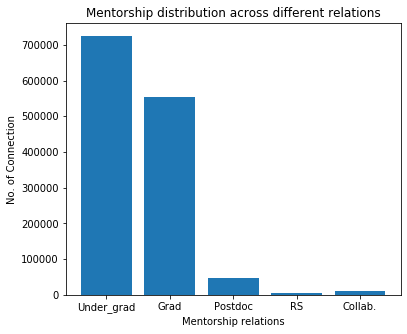

In [54]:
fig = plt.figure(figsize=(6,5))
plt.bar(index1, conn_list)
plt.xlabel('Mentorship relations', fontsize=10)
plt.ylabel('No. of Connection', fontsize=10)
plt.title('Mentorship distribution across different relations')
plt.show()

In [15]:
print('Missing mentor informtaion i.e pid2==0')
print(conn_undergrad[conn_undergrad['pid2']==0].shape[0])
print(conn_grad[conn_grad['pid2']==0].shape[0])
print(conn_postdoc[conn_postdoc['pid2']==0].shape[0])
print(conn_rs[conn_rs['pid2']==0].shape[0])
print(conn_collab[conn_collab['pid2']==0].shape[0])

Missing mentor informtaion i.e pid2==0
711129
7
0
0
0


In [16]:
conn_list

[724576, 554283, 46664, 4614, 12272]

In [17]:
G=nx.from_pandas_edgelist(connect_remove, 'pid1', 'pid2',create_using=nx.DiGraph())
G.add_nodes_from(nodes_for_adding=people['pid'].tolist())

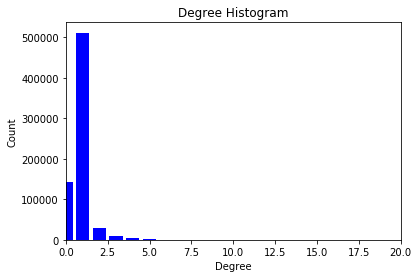

In [18]:
degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#plt.ylim(0,20000)
plt.xlim(0,20)
plt.show()

In [19]:
sub_keyword=['computerscience','neuro','math','physiology','robotics','chemistry','physics','ling','meteorology','astronomy']

(21313, 14)
(121849, 14)
(34648, 14)
(983, 14)
(3472, 14)
(83849, 14)
(40437, 14)
(12192, 14)
(3091, 14)
(4125, 14)


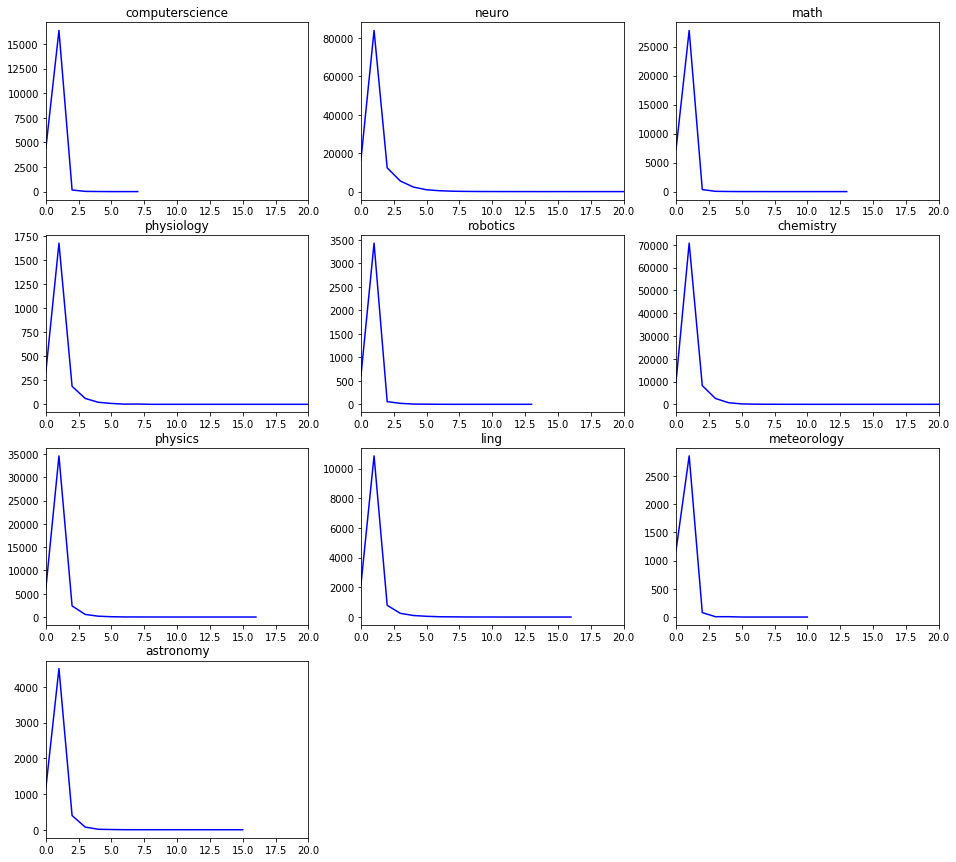

In [20]:
#fig, ax = plt.subplots(nrows=2, ncols=2)
fig = plt.figure(figsize=(16,15))
nrows=2
ncols=2
col=0
row=0
for x,i in enumerate(sub_keyword):
    people1=people[people['majorarea'].str.contains(i)]
    print(people1.shape)
    pid=people1['pid']
    conn=connect_remove[(connect_remove['pid1'].isin(pid.values))|(connect_remove['pid2'].isin(pid.values))]
    con_uni_pid=pd.unique(conn[['pid1', 'pid2']].values.ravel('K'))
    people_mod=people[people['pid'].isin(con_uni_pid)]
    G1=nx.from_pandas_edgelist(conn, 'pid1', 'pid2',create_using=nx.DiGraph())
    G1.add_nodes_from(nodes_for_adding=people_mod['pid'].tolist())
    deg_sequence = sorted([d for n, d in G1.out_degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(deg_sequence)
    deg, cnt = zip(*degreeCount.items())
    plt.subplot(4, 3, x+1)
    plt.plot(deg, cnt, color='b')
    plt.title(i)
    plt.xlim(0,20)
plt.show()

In [ ]:
a=connect_remove[connect_remove['pid2']==2].sort_values(by=['startdate', 'stopdate'])

In [39]:
connect_remove=connect[~(connect['pid2']==0)].copy()

In [13]:
connect_remove['startdate'].fillna('0000', inplace=True)
connect_remove['stopdate'].fillna('0000', inplace=True)

/home/dhananjay/genealogy/.env/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
date_att=['startdate','stopdate']
date_att_add=['startdate_year','stopdate_year']

In [17]:
connect_remove[date_att]=connect_remove[date_att].applymap(lambda x : int(x.split('-')[0].strip()) if len(x) > 1 else x)

/home/dhananjay/genealogy/.env/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
connect_remove[['startdate','stopdate']].head()

,startdate,stopdate
0,1998,2005
1,2000,2005
2,2003,2006
3,2002,2008
4,0,1984


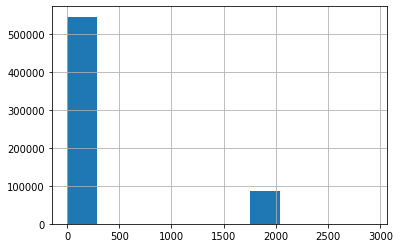

In [48]:
connect_remove['startdate'].hist(bins=10)

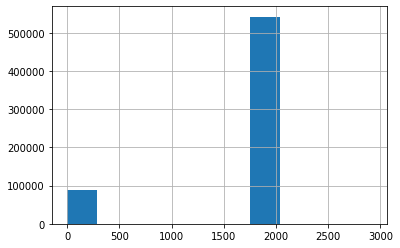

In [49]:
connect_remove['stopdate'].hist(bins=10)

In [ ]:
#date_index=connect_remove.set_index('startdate_year')

In [ ]:
#date_index.index=pd.to_datetime(date_index.index, errors='raise',unit='ns', yearfirst=True)

In [ ]:
connect_remove['startdate'].unique().shape

In [50]:
connect_remove.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631273 entries, 0 to 1342408
Data columns (total 11 columns):
cid           631273 non-null int64
pid1          631273 non-null int64
pid2          631273 non-null int64
relation      631273 non-null int64
location      616971 non-null object
locid         631273 non-null float64
department    186285 non-null object
startdate     631273 non-null int64
stopdate      631273 non-null int64
addedby       631272 non-null object
dateadded     631273 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 57.8+ MB


In [112]:
mod_connect_remove=connect_remove[connect_remove['startdate']!=0]

In [113]:
mod_connect_remove.shape

(85474, 11)

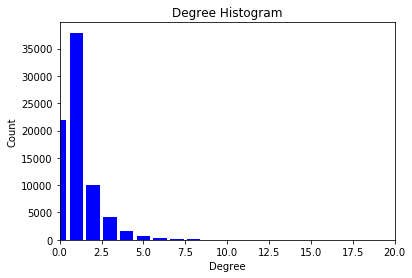

In [115]:
G=nx.from_pandas_edgelist(mod_connect_remove, 'pid1', 'pid2',create_using=nx.DiGraph())
degree_sequence1 = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
degreeCount1 = collections.Counter(degree_sequence1)
deg1, cnt1 = zip(*degreeCount1.items())

fig, ax = plt.subplots()
plt.bar(deg1, cnt1, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#plt.ylim(0,20000)
plt.xlim(0,20)
plt.show()

(0, 20)

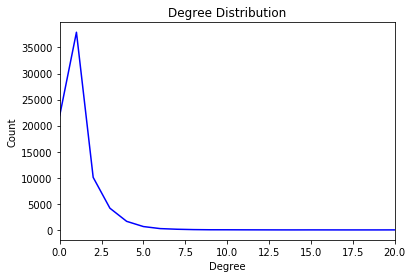

In [118]:
plt.plot(deg1, cnt1, color='b')
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
#plt.ylim(0,20000)
plt.xlim(0,20)